In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

In [3]:
path = './data/movielens/'

In [4]:
os.listdir(path)

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']

In [155]:
os.listdir(path)

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']

In [156]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

* timestamp는 영화에 대한 평점을 기록한 시점. 영화가 처음 출시한 시점이 아니다

In [157]:
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [158]:
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [159]:
print(movies_df.shape)
print(movies_df.head())

(9742, 2)
                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  


### 평점 데이터의 기초 통계량

In [160]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [161]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [162]:
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.0425292390605359


In [163]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [164]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [165]:

# nan 값이 있는지 확인한다
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1AD566198>,
      dtype=object)

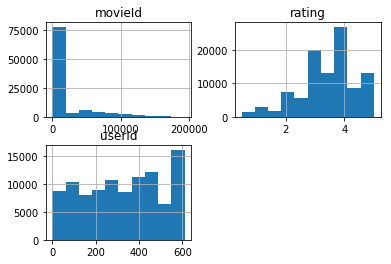

In [166]:
ratings_df[['userId','movieId','rating']].hist()

### Pandas의 GroupBy 사용하기

In [167]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
2       2.0         1
        2.5         1
        3.0         4
        3.5         4
        4.0         9
        4.5         4
        5.0         6
3       0.5        20
        2.0         1
        3.0         1
        3.5         1
        4.0         1
        4.5         5
        5.0        10
4       1.0        23
        2.0        26
        3.0        39
        4.0        64
        5.0        64
5       1.0         1
        2.0         3
        3.0        17
        4.0        13
        5.0        10
6       1.0         7
                 ... 
606     4.0       441
        4.5       139
        5.0        33
607     1.0         3
        2.0        10
        3.0        63
        4.0        59
        5.0        52
608     0.5        33
        1.0        29
        1.5        30
        2.0        69
        2.5        95
        3.0      

* userId와 rating을 기준으로 기초 통계량

In [168]:
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
6,389.041401,3.493631,8.455546e+08
7,10908.256579,3.230263,1.115625e+09
8,297.978723,3.574468,8.394636e+08
9,3707.043478,3.260870,1.044657e+09


In [169]:
userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [170]:
user_info = ratings_df.groupby('userId')['movieId'].count()

In [171]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [172]:
import seaborn as sns

C:\Users\maerad7\Anaconda3\envs\ML\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


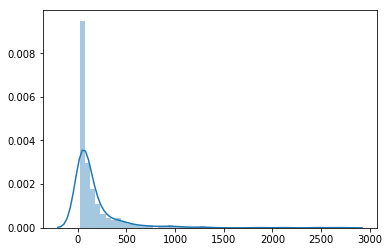

In [173]:
# user가 몇개의 영화에 대해서 rating을 했는지를 볼 수 있는 분포(그래프)
sns.distplot(user_info.values)

### user가 평균적으로 준 평점과 평점을 준 영화의 수

In [174]:
stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(), 
'rating_std': ratings_df.groupby('userId')['rating'].std()})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


### rating이 많은 영화(다시 말해, 사람들이 관심 많은 영화)

* 많이 본 영화일수록 평점이 좋다? 

In [180]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


In [181]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
224,260,251,4.231076,0.872004
418,480,238,3.750000,0.855301
97,110,237,4.031646,0.967726
507,589,224,3.970982,0.926833
461,527,220,4.225000,0.975996


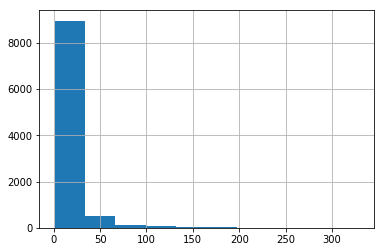

In [182]:
# long tail economy
movieid_user_df['num_users_watch'].hist()

In [183]:
# 1번 또는 1명만 평점을 준 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch == 1].count()


3446

In [184]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [185]:
# 영화 정보를 활용
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [186]:
# 평점을 많이 받은 영화 
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [187]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(),
})

In [188]:
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [189]:
df.head(10)

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)
6,102,Heat (1995)
7,54,Sabrina (1995)
8,8,Tom and Huck (1995)
9,16,Sudden Death (1995)


In [190]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
260,251,Star Wars: Episode IV - A New Hope (1977)
480,238,Jurassic Park (1993)
110,237,Braveheart (1995)
589,224,Terminator 2: Judgment Day (1991)


### 특정 영화의 평점 분포

* movieId :  356, Forrest Gump(1994)
* movieId : 2571, Matrix, The (1999)

In [196]:
# 많은 사람이 좋은 평점을 줌

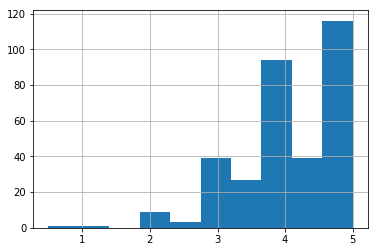

In [191]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()

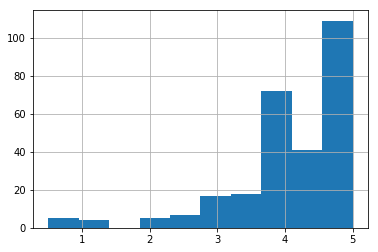

In [192]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

### 특정 유저가 주는 평점과 실제 영화에 대한 평점 분포가 비슷할까? 

* 나는 일반적인 영화 관람객일까? 특이한 취향을 갖고있는 사람일까? 

In [197]:
# 포레스트 검프 평점을 조금 준 친구

In [193]:
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


In [194]:
ratings_df[(ratings_df.movieId == 2571) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


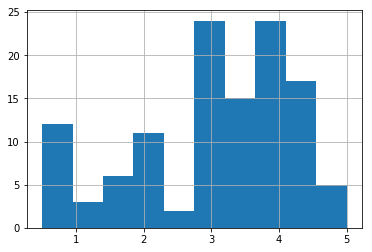

In [198]:
ratings_df[ratings_df.userId == 76]['rating'].hist()

### 장르 분석하기

* 전체 장르 파악하기

In [199]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [201]:
movies_df['genres'].values

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ..., 'Drama',
       'Action|Animation', 'Comedy'], dtype=object)

In [202]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [211]:
# 장르의 종류 확인

In [207]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Western', 'Horror', 'Drama', 'Musical', '(no genres listed)', 'Children', 'Animation', 'Action', 'IMAX', 'Crime', 'Sci-Fi', 'Comedy', 'War', 'Adventure', 'Film-Noir', 'Thriller', 'Fantasy', 'Mystery', 'Documentary', 'Romance']


In [215]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Western,Horror,Drama,Musical,(no genres listed),Children,Animation,Action,IMAX,Crime,Sci-Fi,Comedy,War,Adventure,Film-Noir,Thriller,Fantasy,Mystery,Documentary,Romance
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [217]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
movies_df.drop('genres',axis=1, inplace=True)

In [219]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 특정 장르의 평점과 user 분석

In [220]:
movies_df.columns

Index(['title', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [229]:
movieId_list = movies_df['title'][movies_df.Animation ==1]

In [230]:
movieId_list

movieId
1                                          Toy Story (1995)
13                                             Balto (1995)
48                                        Pocahontas (1995)
239                                   Goofy Movie, A (1995)
313                               Swan Princess, The (1994)
364                                   Lion King, The (1994)
551                  Nightmare Before Christmas, The (1993)
558                                  Pagemaster, The (1994)
588                                          Aladdin (1992)
594                  Snow White and the Seven Dwarfs (1937)
595                             Beauty and the Beast (1991)
596                                        Pinocchio (1940)
610                                      Heavy Metal (1981)
616                                  Aristocats, The (1970)
631                          All Dogs Go to Heaven 2 (1996)
661                        James and the Giant Peach (1996)
673                             

In [226]:
# animation인 영화는 611개

In [231]:
movieId_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [235]:
# aniamtion인 평점 정보

In [233]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
35,1,596,5.0,964982838
38,1,661,5.0,964982838
39,1,673,3.0,964981775
50,1,1023,5.0,964982681
51,1,1024,5.0,964982876
52,1,1025,5.0,964982791
53,1,1029,5.0,964982855
54,1,1030,3.0,964982903
56,1,1032,5.0,964982791


In [237]:
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
7      3.392857
8      5.000000
9      4.000000
10     3.866667
12     3.000000
15     2.954545
16     3.958333
17     4.400000
18     3.758065
19     2.937500
20     4.184615
21     3.241379
22     2.708333
23     3.800000
24     4.250000
25     4.666667
27     3.363636
28     3.400000
29     3.500000
30     4.600000
31     4.000000
32     3.000000
33     3.833333
34     3.642857
35     3.000000
         ...   
580    3.333333
581    4.300000
582    3.875000
583    3.454545
584    4.800000
585    4.000000
586    4.610000
587    4.333333
588    3.000000
590    3.781250
591    3.800000
592    3.833333
593    3.142857
594    4.600000
595    4.500000
596    3.979592
597    4.000000
598    1.000000
599    2.914110
600    3.217742
601    4.571429
602    4.000000
603    2.250000
604    3.428571
605    2.942308
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Len

## 장르간의 상관관계
- 1 양의 상관관계, -1 음의 상관관계

In [238]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


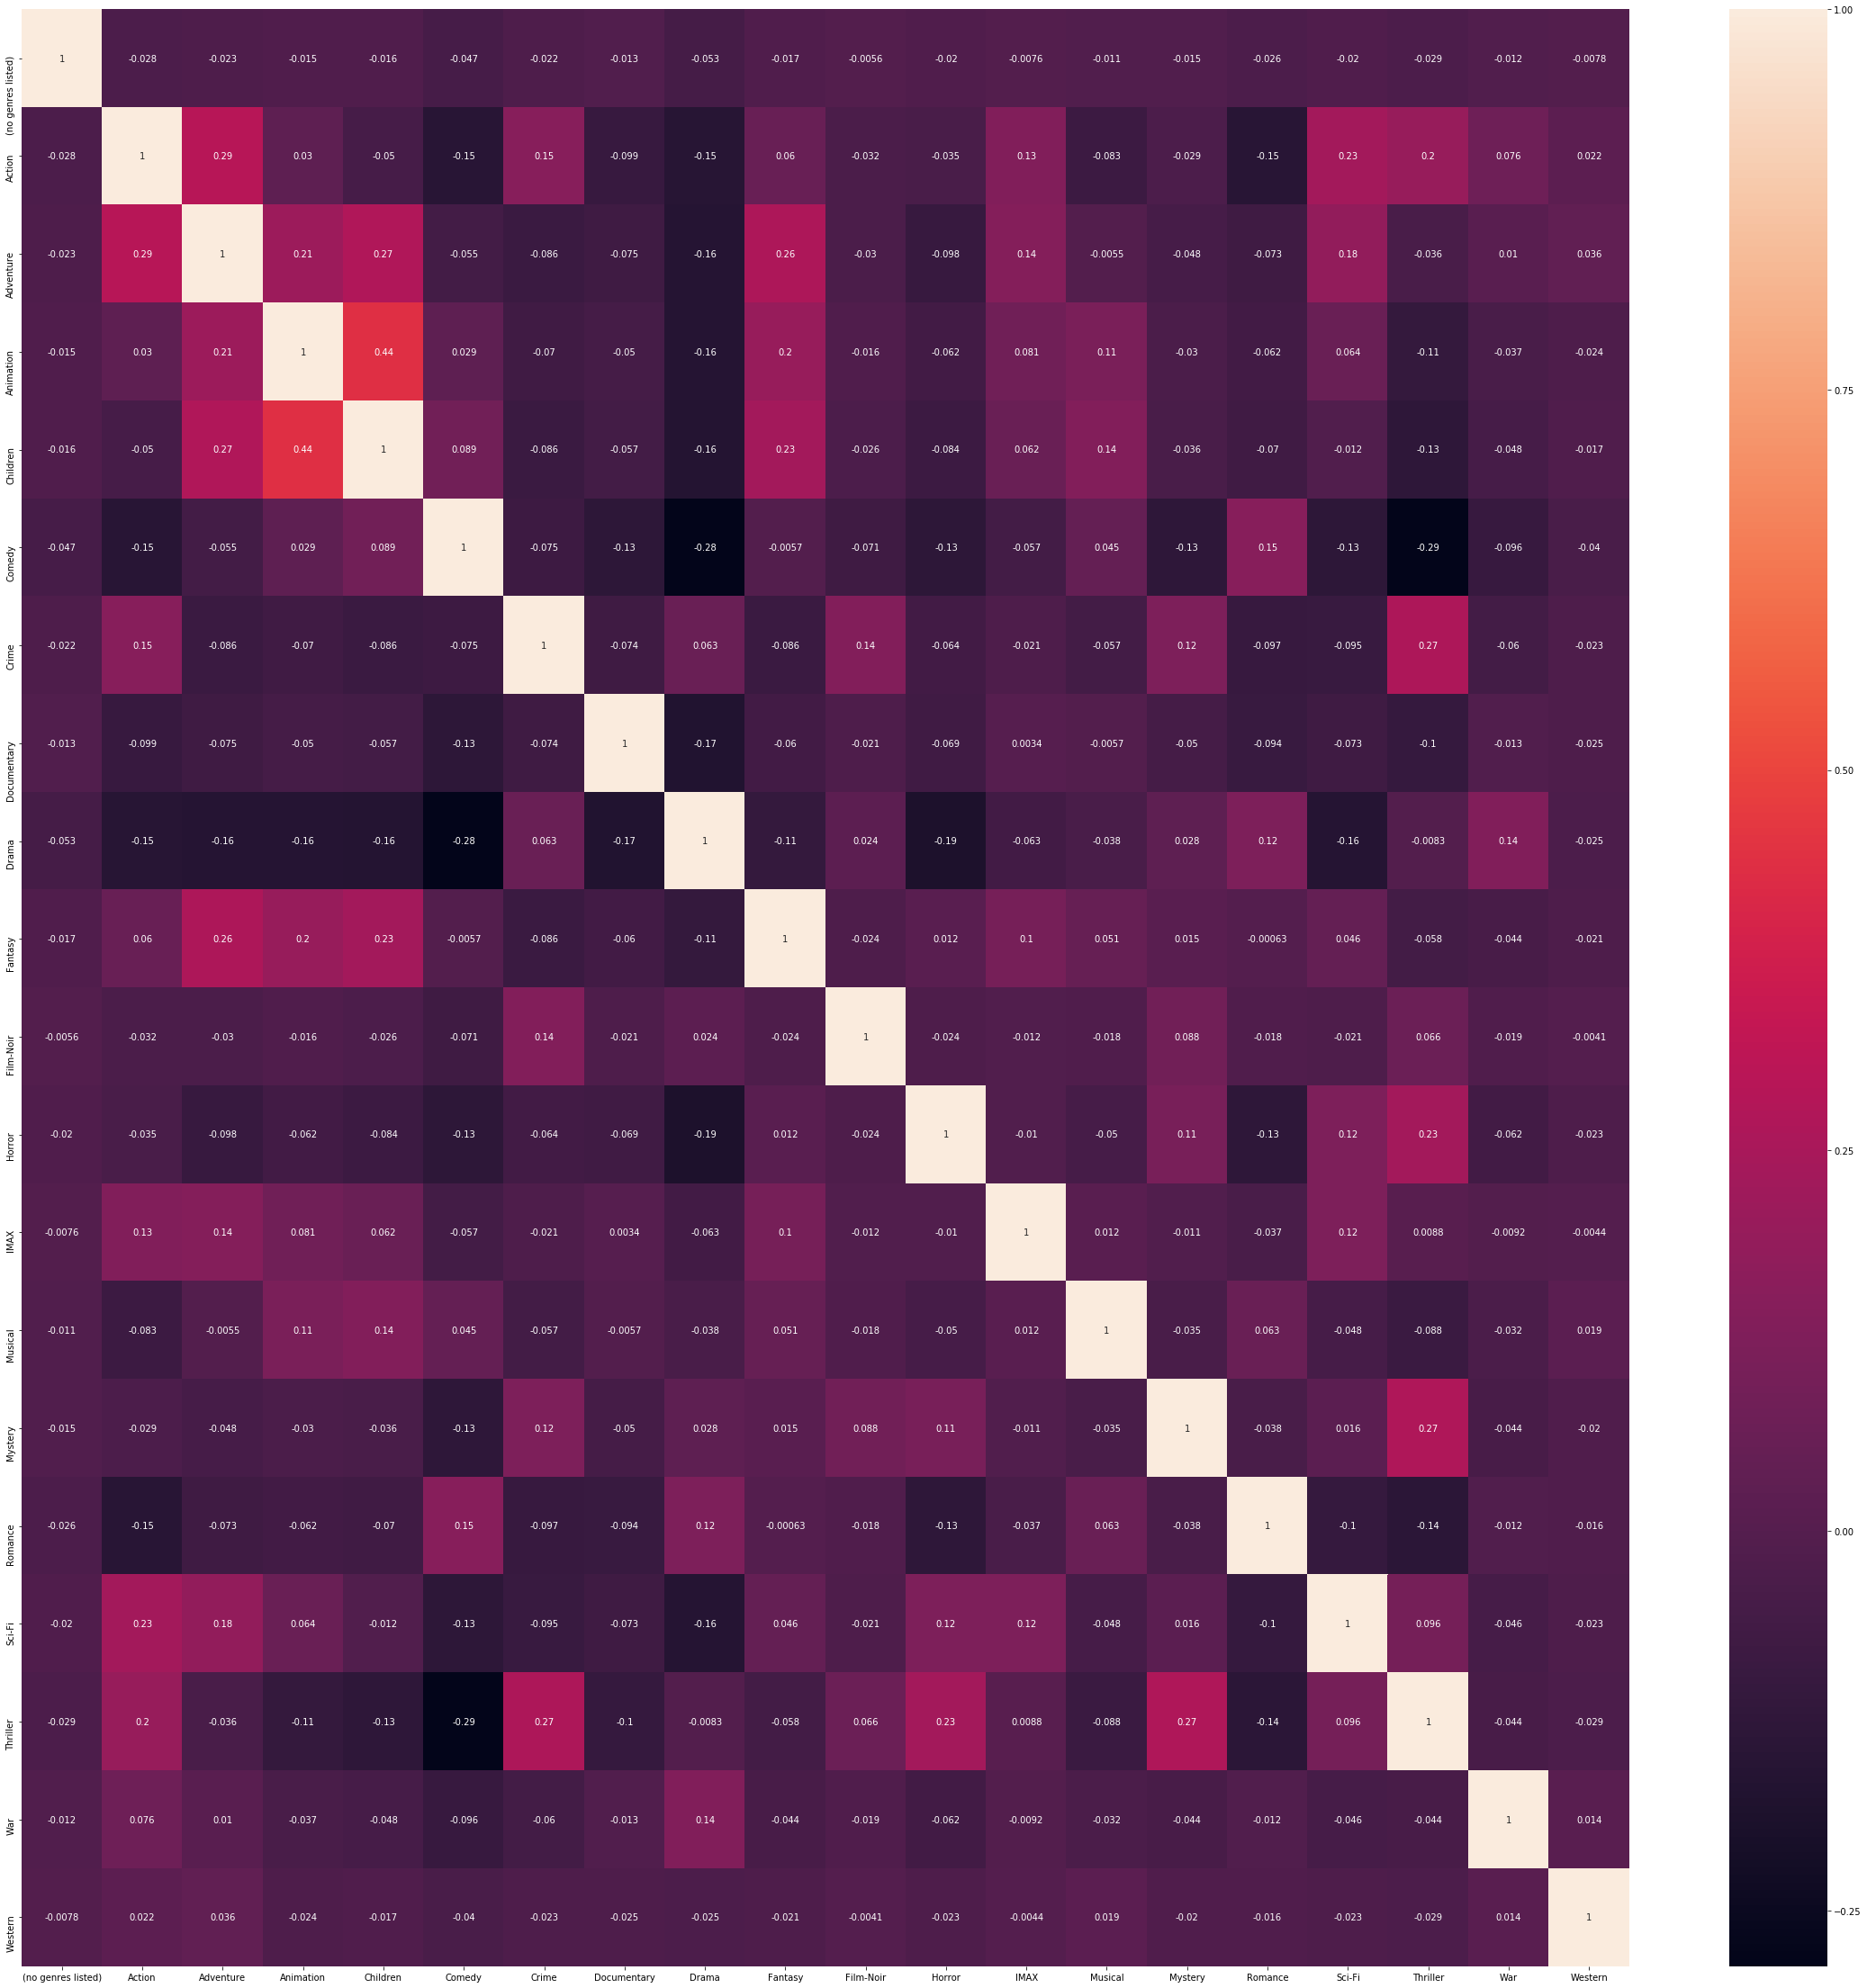

In [239]:
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

## 영화 이름, 연도분석

In [241]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
title_df = movies_df.copy()
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,(1995)
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,(1995)
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)


In [247]:
title_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64

In [248]:
title_df[title_df['year'].isnull()]

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
40697,Babylon 5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
140956,Ready Player One,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,NaN
143410,Hyena Road,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
149334,Nocturnal Animals,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,NaN
156605,Paterson,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
162414,Moonlight,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
167570,The OA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
171495,Cosmos,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [257]:
# 연도가 없는 영화 또는 노장르 라고 표시된 영화는 드랍
title_df[title_df['(no genres listed)']==1].shape

(34, 22)

In [262]:
title_df.dropna(axis=0, inplace=True)
title_df.isnull().sum()

title                 0
(no genres listed)    0
Action                0
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
year                  0
dtype: int64

In [263]:
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))

In [266]:
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


## 연도별 영화 데이터분석

In [268]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
1917      1
1919      1
1920      2
1921      1
1922      1
1923      4
1924      5
1925      4
1926      5
1927      7
1928      4
1929      4
1930      5
1931     14
1932      9
1933     12
1934     11
1935     13
1936     18
1937     16
1938     15
1939     23
1940     25
1941     18
1942     23
       ... 
1989    142
1990    147
1991    147
1992    167
1993    198
1994    237
1995    259
1996    276
1997    260
1998    258
1999    263
2000    283
2001    294
2002    311
2003    279
2004    279
2005    273
2006    295
2007    284
2008    269
2009    282
2010    247
2011    254
2012    233
2013    239
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [272]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
2009    282
2003    279
2004    279
2014    278
1996    276
2015    274
2005    273
2008    269
1999    263
1997    260
1995    259
1998    258
2011    254
2010    247
2013    239
1994    237
2012    233
2016    218
1993    198
1992    167
1988    165
1987    153
1991    147
1990    147
2017    147
       ... 
1936     18
1945     17
1937     16
1944     16
1952     16
1938     15
1931     14
1935     13
1933     12
1934     11
1943     10
1932      9
1927      7
1924      5
1926      5
1930      5
1928      4
1925      4
1929      4
1923      4
1916      4
1920      2
1922      1
1921      1
1919      1
1917      1
1915      1
1908      1
1903      1
1902      1
Name: title, Length: 106, dtype: int64

In [274]:
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

## 개봉연도 그리고 평점

In [276]:
title_df[title_df['year']=='2017']

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
122898,Justice League (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122906,Black Panther (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122916,Thor: Ragnarok (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122918,Guardians of the Galaxy 2 (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122926,Untitled Spider-Man Reboot (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
143355,Wonder Woman (2017),0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
166534,Split (2017),0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,2017
167064,I Am Not Your Negro (2017),0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2017


In [ ]:
# 2017년도에 개봉된 영화의 평균 점수

In [277]:
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']=='2017'].index)].mean()

3.5780911062906724

In [278]:
title_df['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', '1903', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '1908'], dtype=object)

In [282]:
results=[]
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year']==str(year)].index)].mean()
    results.append((year,avg_ratings))
    
result_df = pd.DataFrame(results, columns=['year','avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
88,1917,4.500000
76,1919,2.000000
83,1920,3.812500
77,1921,4.100000
67,1922,3.531250


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1AFEFA3C8>]],
      dtype=object)

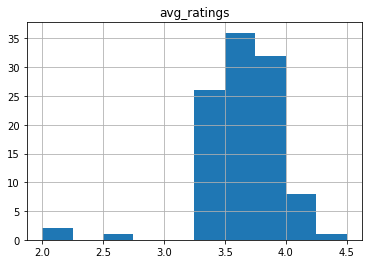

In [284]:
result_df.hist()